In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [3]:
df = pd.read_csv('Open Data Tax Receipts Source.csv')
df.head()

,Year,Month,Something,SomeThingElse,Value
0,1984,January,Actual Outturn,Customs,8888
1,1984,January,Actual Outturn,Excise Duty,100210
2,1984,January,Actual Outturn,Capital Gains Tax,2220
3,1984,January,Actual Outturn,Stamps,9683
4,1984,January,Actual Outturn,Income Tax,203590


In [7]:
df.SomeThingElse.value_counts()

Capital Gains Tax               625
Valued Added Tax                625
Customs                         625
Income Tax                      625
Stamps                          625
Excise Duty                     625
Corporation Tax                 625
Capital Acquisitions Tax        445
Training and Employment Levy    410
Unallocated Tax Receipts        364
Motor Vehicle Duties            209
Local Property Tax              143
Name: SomeThingElse, dtype: int64

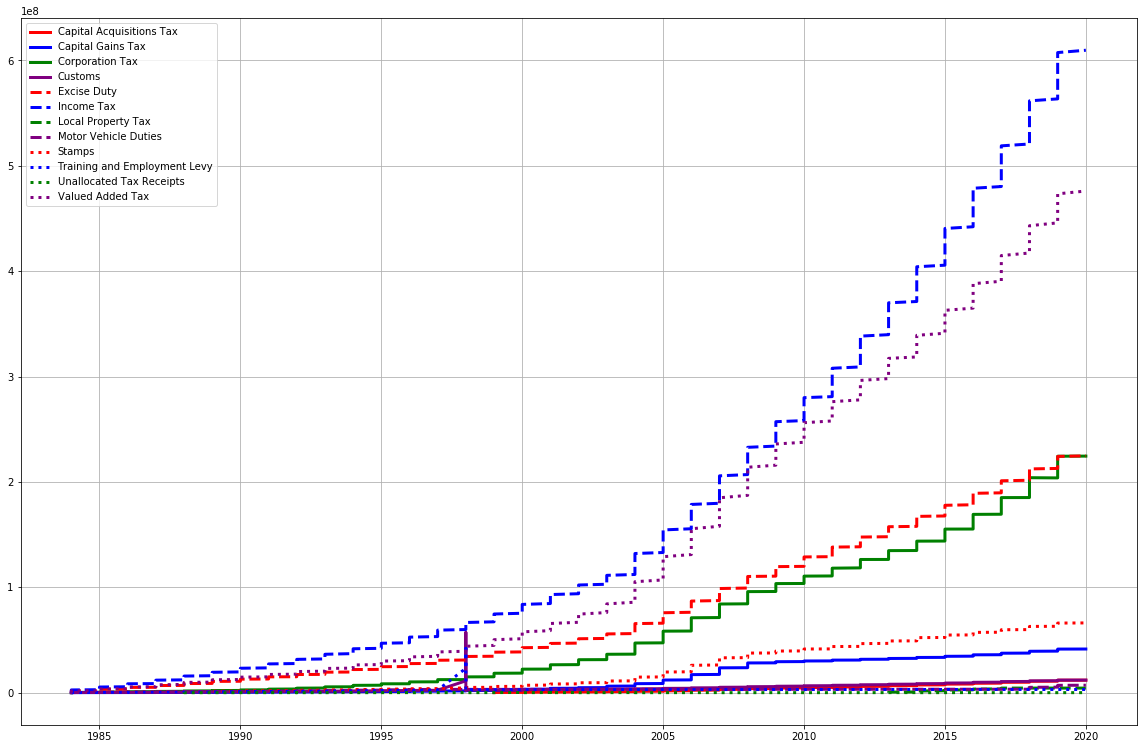

In [15]:
colors = ["red", "blue", "green", "purple"]
lines = ["-", "--", ":"]
i = 0
j = 0
byThing = df.groupby('SomeThingElse')
fig, ax = plt.subplots(1,1, figsize=(20, 13))
for a, b in byThing:
    plt.plot(b['Year'], b['Value'].cumsum(), ls=lines[j], c=colors[i], lw=3, label=a)
    if i < 3:
        i += 1
    else:
        i = 0
        j += 1
plt.legend()
plt.grid();

If that isn't funny business, I've never seen it.

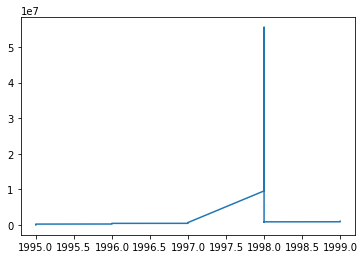

In [18]:
customs = byThing.get_group('Customs')
customs = customs[(customs.Year >= 1995) & (customs.Year < 2000)]
plt.plot(customs['Year'], customs['Value'].cumsum());

In [20]:
df[(df.Year==1998) & (df.SomeThingElse=="Customs")]

,Year,Month,Something,SomeThingElse,Value
1603,1998,January,Actual Outturn,Customs,8888167
1612,1998,February,Actual Outturn,Customs,25648709
1621,1998,March,Actual Outturn,Customs,20315809
1630,1998,April,Actual Outturn,Customs,-54777516
1639,1998,May,Actual Outturn,Customs,17522
1648,1998,June,Actual Outturn,Customs,16507
1657,1998,July,Actual Outturn,Customs,26538
1666,1998,August,Actual Outturn,Customs,15745
1675,1998,September,Actual Outturn,Customs,15745
1684,1998,October,Actual Outturn,Customs,18284
